In [214]:
# install library
! pip install google-play-scraper

In [215]:
# import library
from google_play_scraper import  Sort, reviews_all
from google_play_scraper import reviews
from google_play_scraper import app

# import pandas yang digunakan untuk analisis dan manipulasi data
import pandas as pd

# import numpy yang digunakan untuk memproses array multidimensi
import numpy as np

SCRAPING

In [216]:
# mulai scraping
result, continuation_token = reviews(
    'com.ruangguru.livestudents',
    lang='id', #bahasa indonesia
    country='id', #negara indonesia
    sort=Sort.MOST_RELEVANT, #sorting yang paling relevan
    count=1005, #jumlah dataset
    filter_score_with=None #mulai scraping: 1,2,3,4,5, jadi nanti none nya bisa di ganti mau bintang berapa
)

In [217]:
# membuat Dataframe dari hasil scraping
data = pd.DataFrame(np.array(result),columns=['review'])

data = data.join(pd.DataFrame(data.pop('review').tolist()))

data #menampilkan semua data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,924c87f5-d5e1-49b7-8d0c-93e5005b4877,Aji Abdillah Mursyid,https://play-lh.googleusercontent.com/a/ACg8oc...,terkadang ketika di pembahasan angkanya itu te...,4,5,7.0.4,2025-10-02 19:22:25,Maaf ya kalau angka atau huruf di pembahasan t...,2025-10-03 03:47:25,7.0.4
1,a5529b81-f622-4f5a-a1d2-f77048bd4094,Keysyah radiah Amanah,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi belajar terbaik sejauh ini! Materinya...,5,291,6.99.0,2025-08-18 03:34:09,"Hai Keysyah, terima kasih banyak sudah kasih b...",2025-08-18 04:40:49,6.99.0
2,658876ea-30e9-4a46-b29d-f1f9d761af50,rasya apriyanto,https://play-lh.googleusercontent.com/a/ACg8oc...,"menurut saya udah bagus cuman, cara nawarin pa...",4,1,7.0.4,2025-10-12 11:52:54,Maaf kalau sempat membuat jadi kurang nyaman. ...,2025-10-14 04:39:06,7.0.4
3,85011ad4-0437-4310-bebe-c51f54708515,Renata Pasaribu,https://play-lh.googleusercontent.com/a/ACg8oc...,aplikasinya sangat menyenangkan bisa langsung ...,5,270,6.99.0,2025-08-03 07:22:33,Wah senang banget dengarnya! Makasih ya Renata...,2025-08-05 07:51:11,6.99.0
4,545a6f5e-a46c-44eb-b3c3-6271d48d6d63,Dinar hafizah berliani,https://play-lh.googleusercontent.com/a/ACg8oc...,jujur aplikasinya lumayan membantu aku buat me...,5,208,7.0.2,2025-09-02 02:14:10,Wihh keren banget semangat belajarnya Dinar! M...,2025-09-03 03:19:08,7.0.2
...,...,...,...,...,...,...,...,...,...,...,...
1000,32040f47-e403-4b9c-af9c-8473f0866158,Adiyatma Rafi,https://play-lh.googleusercontent.com/a/ACg8oc...,"•sesudah liat satu materi,mau lanjut ke Vidio ...",5,0,None,2020-07-19 04:55:49,Hai. Mohon maaf atas kendala yang dialami. Yuk...,2020-08-06 14:11:40,None
1001,9c74cc5d-5a76-4d5a-97c0-4256a785cec2,Adelia Zafira,https://play-lh.googleusercontent.com/a/ACg8oc...,"Semua materi ada, untuk semua kurikulum.. Teru...",5,67,6.11.0,2021-04-04 10:09:15,"Hai Adelia, terima kasih atas apresiasi yang k...",2021-04-04 10:20:19,6.11.0
1002,a144ceb8-912a-48da-87e0-86c6dda6f010,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ini gimana ya kok saya tidak bisa mencoba lati...,2,0,None,2019-12-03 12:20:23,Hai Yoga. Terima kasih sudah menggunakan Aplik...,2019-12-03 12:26:51,None
1003,aeedf06a-3b6d-4c74-8a58-4057dfc634e3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya senang dengan update terbaru ruangguru de...,4,1,None,2018-10-23 12:09:15,"Halo Jupri, terimakasih sudah memberikan revie...",2018-10-29 03:02:49,None


CASE FOLDING

In [218]:
# Fungsi case folding
data['content_casefold'] = data['content'].astype(str).str.lower()

In [219]:
# Simpan ke CSV
data.to_csv("ruangguru_reviews.csv", index=False, encoding='utf-8-sig')

PREPROCESSED

In [220]:
# Membaca data hasil scraping lama
data = pd.read_csv('ruangguru_reviews.csv')
print("Jumlah data:", len(data))
data.head()

Jumlah data: 1005


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_casefold
0,924c87f5-d5e1-49b7-8d0c-93e5005b4877,Aji Abdillah Mursyid,https://play-lh.googleusercontent.com/a/ACg8oc...,terkadang ketika di pembahasan angkanya itu te...,4,5,7.0.4,2025-10-02 19:22:25,Maaf ya kalau angka atau huruf di pembahasan t...,2025-10-03 03:47:25,7.0.4,terkadang ketika di pembahasan angkanya itu te...
1,a5529b81-f622-4f5a-a1d2-f77048bd4094,Keysyah radiah Amanah,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi belajar terbaik sejauh ini! Materinya...,5,291,6.99.0,2025-08-18 03:34:09,"Hai Keysyah, terima kasih banyak sudah kasih b...",2025-08-18 04:40:49,6.99.0,aplikasi belajar terbaik sejauh ini! materinya...
2,658876ea-30e9-4a46-b29d-f1f9d761af50,rasya apriyanto,https://play-lh.googleusercontent.com/a/ACg8oc...,"menurut saya udah bagus cuman, cara nawarin pa...",4,1,7.0.4,2025-10-12 11:52:54,Maaf kalau sempat membuat jadi kurang nyaman. ...,2025-10-14 04:39:06,7.0.4,"menurut saya udah bagus cuman, cara nawarin pa..."
3,85011ad4-0437-4310-bebe-c51f54708515,Renata Pasaribu,https://play-lh.googleusercontent.com/a/ACg8oc...,aplikasinya sangat menyenangkan bisa langsung ...,5,270,6.99.0,2025-08-03 07:22:33,Wah senang banget dengarnya! Makasih ya Renata...,2025-08-05 07:51:11,6.99.0,aplikasinya sangat menyenangkan bisa langsung ...
4,545a6f5e-a46c-44eb-b3c3-6271d48d6d63,Dinar hafizah berliani,https://play-lh.googleusercontent.com/a/ACg8oc...,jujur aplikasinya lumayan membantu aku buat me...,5,208,7.0.2,2025-09-02 02:14:10,Wihh keren banget semangat belajarnya Dinar! M...,2025-09-03 03:19:08,7.0.2,jujur aplikasinya lumayan membantu aku buat me...


In [221]:
# mengambil fitur hanya konten dan score
data = data[['content','score']]
data

,content,score
0,terkadang ketika di pembahasan angkanya itu te...,4
1,Aplikasi belajar terbaik sejauh ini! Materinya...,5
2,"menurut saya udah bagus cuman, cara nawarin pa...",4
3,aplikasinya sangat menyenangkan bisa langsung ...,5
4,jujur aplikasinya lumayan membantu aku buat me...,5
...,...,...
1000,"•sesudah liat satu materi,mau lanjut ke Vidio ...",5
1001,"Semua materi ada, untuk semua kurikulum.. Teru...",5
1002,Ini gimana ya kok saya tidak bisa mencoba lati...,2
1003,Saya senang dengan update terbaru ruangguru de...,4


In [222]:
for label, group in data.groupby('score'):
    print(f"\nScore: {label}")
    print(group[['content', 'score']].head())



Score: 1
                                              content  score
9   mimiiiiinnn, aku cuma mau belajar miin, kenapa...      1
14  sumpah ya, cs nya ga bgt, pernah sampe nanya h...      1
16  kenapa kok akhir2 ini aplikasi gak bisa dibuka...      1
20  kecewa banget setiap masuk ke apk ruangguru pa...      1
32  materi pelajaran nya bikin bingung, gak lengka...      1

Score: 2
                                               content  score
18   pas buka aplikasinya suka keluar terus, padaha...      2
29   Untuk aplikasinya sangat baik, namun dari sisi...      2
68   kenapa lemot bgt ya, padahal wifi aman, meori ...      2
70   Untuk kelas offline nya udah bagus saya ikut, ...      2
107  bagus banget cuma kesel sama pas kerjain kuis ...      2

Score: 3
                                              content  score
11  bagus, lengkap, adaptonya juga keren, tapi gak...      3
13  sy mengalami kendala dmn hri ini sy menjwb soa...      3
19  Tolong optimalkan sistemnya dong, Tka sudah m

In [223]:
# teks preprocessing dengan NLTK
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [224]:
# Hapus Duplikat
data = data.drop_duplicates(subset='content').reset_index(drop=True)

print("\n=== SETELAH HAPUS DUPLIKAT ===")
print(data)


=== SETELAH HAPUS DUPLIKAT ===
                                                content  score
0     terkadang ketika di pembahasan angkanya itu te...      4
1     Aplikasi belajar terbaik sejauh ini! Materinya...      5
2     menurut saya udah bagus cuman, cara nawarin pa...      4
3     aplikasinya sangat menyenangkan bisa langsung ...      5
4     jujur aplikasinya lumayan membantu aku buat me...      5
...                                                 ...    ...
998   •sesudah liat satu materi,mau lanjut ke Vidio ...      5
999   Semua materi ada, untuk semua kurikulum.. Teru...      5
1000  Ini gimana ya kok saya tidak bisa mencoba lati...      2
1001  Saya senang dengan update terbaru ruangguru de...      4
1002  Suka banget💛 Pembahasan mudah dimengerti karen...      5

[1003 rows x 2 columns]


In [225]:
# Hapus URL, Mention, Hashtag, Emoji
import re

def remove_url_mention_hashtag_emoji(text):
    # hapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # hapus mention & hashtag
    text = re.sub(r'@\w+|#\w+', '', text)
    # hapus emoji (unicode range)
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # simbol & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map
        "\U0001F1E0-\U0001F1FF"  # bendera
        "\U00002500-\U00002BEF"  # simbol & karakter cina
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)
    # hapus tanda baca aneh
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    return text.strip()


In [226]:
# Hapus angka & tanda baca
import string

def remove_number_punct(text):
    text = re.sub(r'\d+', '', text)  # hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [227]:
# Hapus Spasi berlebihan pada teks mentah
def remove_extra_spaces(text):
    return " ".join(text.split())


In [228]:
# Tokenisasi teks menjadi list kata
from nltk.tokenize import word_tokenize
import string

def tokenize_text(text):
    return word_tokenize(text)

def remove_punctuation(tokens):
    table = str.maketrans("", "", string.punctuation)
    return [word.translate(table) for word in tokens if word.translate(table) != ""]

def clean_whitespace(tokens):
    return [token.strip() for token in tokens]

In [229]:
# stopwords (kata di tulis tetapi tidak ada artinya atau kata umum yang bermakna)

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# mengambil semua kamus stopwords bahasa indonesia
stop_words = set(stopwords.words('indonesian'))

# fungsi untuk menghapus stopwords
def remove_stopwords(tokens):
  return [token for token in tokens if token not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [230]:
import re

# =====================================================
# 🧩 NORMALISASI KATA SLANG, TYPO, DAN PEMBERSIHAN TOKEN
# =====================================================

# Kamus slang
slang_dict = {
    'gk': 'tidak', 'ga': 'tidak', 'nggak': 'tidak', 'ngga': 'tidak',
    'bgt': 'banget', 'beneran': 'benar', 'tp': 'tapi', 'jd': 'jadi',
    'jg': 'juga', 'udh': 'sudah', 'udah': 'sudah', 'aja': 'saja',
    'sm': 'sama', 'dr': 'dari', 'dl': 'dulu', 'bgs': 'bagus',
    'bgus': 'bagus', 'mksdnya': 'maksudnya', 'krn': 'karena',
    'trs': 'terus', 'bntu': 'bantu', 'mksd': 'maksud', 'apk': 'aplikasi',
    'trmksh': 'terima kasih', 'trims': 'terima kasih',
    'makasih': 'terima kasih', 'makasi': 'terima kasih',
    'terimakasih': 'terima kasih', 'sbnrnya': 'sebenarnya',
    'bner': 'benar', 'msh': 'masih', 'skrng': 'sekarang',
    'dlm': 'dalam', 'dpt': 'dapat', 'kl': 'kalau', 'klo': 'kalau',
    'klau': 'kalau', 'tdk': 'tidak', 'bkn': 'bukan', 'lg': 'lagi',
    'nyoba': 'mencoba', 'bisaaa': 'bisa', 'bangett': 'banget',
    'baguss': 'bagus', 'ok': 'oke', 'oke': 'baik', 'okey': 'baik'
}

extra_stopwords = set([
    'ya', 'app', 'yg', 'nya', 'nih', 'nihh', 'kok', 'lah', 'dong',
    'ku', 'sy', 'loh', 'deh', 'aja', 'lahh', 'yah', 'yahh', 'mak',
    'oke', 'okey', 'okeyy', 'okayy', 'woow', 'wow', 'hehe', 'haha'
])

hapus_khusus = {'ruangguru', 'ruang', 'guru'}

# Hapus huruf berulang
def remove_repeated_letters(word):
    return re.sub(r'(.)\1{2,}', r'\1', word)

# Normalisasi kata
def normalize_tokens(tokens):
    normalized = []
    for token in tokens:
        token = token.lower()
        token = remove_repeated_letters(token)
        if token in slang_dict:
            token = slang_dict[token]
        if len(token) > 3 and token not in extra_stopwords and token not in hapus_khusus:
            normalized.append(token)
    return normalized

In [231]:
!pip install Sastrawi

In [232]:
# STEMMING (akar kata dengan Sastrawi)
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_tokens(tokens):
    return [stemmer.stem(t) for t in tokens]

In [233]:
# === Refinement Tambahan + TF-IDF + Simpan Hasil ===
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Fungsi Refinement (versi diperbaiki)
def refine_text(text):
    if not isinstance(text, str):
        return ""

    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = text.lower()
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    typo_dict = {
        'ngebosenin': 'membosankan',
        'terlallu': 'terlalu',
        'dilidilihat': 'dilihat',
        'mantapp': 'mantap',
        'bangett': 'banget',
        'baguss': 'bagus',
        'ikllan': 'iklan',
        'woww': 'wow',
        'mangat': 'semangat'
    }
    for wrong, correct in typo_dict.items():
        text = re.sub(rf'\b{wrong}\b', correct, text)

    # 🔥 Deteksi pengulangan kata (harihari, mantap mantap, dll)
    text = re.sub(r'\b(\w+)\s+\1\b', r'\1', text)
    text = re.sub(r'\b([a-z]{2,})\1\b', r'\1', text)
    text = re.sub(r'([a-z]{2,})(\1)', r'\1', text)
    text = re.sub(r'(\b\w+\b)(\s+\1\b)+', r'\1', text)

    # 🔹 Tambahan baru: hapus awalan di-/ke-/me- jika menempel
    text = re.sub(r'\b(di|ke|me)([a-z]{3,})\b', r'\2', text)

    # 🔹 Hapus akhiran -in (lebih aman)
    text = re.sub(r'\b(\w+)(in)\b', r'\1', text)

    # 🔹 Hapus kata awalan "se" secara hati-hati
    text = re.sub(r'\bse(\w{4,})\b', r'\1', text)

    # 🔹 Hapus imbuhan terpisah
    text = re.sub(r'\b(di|ke|me|nge|ny|ku|mu)\b', '', text)

    # 🔹 Rapikan spasi
    text = re.sub(r'\s+', ' ', text).strip()

    # 🔹 Stemming & hapus kata ≤3 huruf
    text = stemmer.stem(text)
    text = ' '.join([w for w in text.split() if len(w) > 3])

    return text

# === Terapkan Semua Fungsi Preprocessing ===
data['clean_text'] = data['content'].apply(remove_url_mention_hashtag_emoji)
data['clean_text'] = data['clean_text'].apply(remove_number_punct)
data['clean_text'] = data['clean_text'].apply(remove_extra_spaces)
data['tokens'] = data['clean_text'].apply(tokenize_text)
data['tokens'] = data['tokens'].apply(remove_punctuation)
data['tokens'] = data['tokens'].apply(clean_whitespace)
data['tokens'] = data['tokens'].apply(remove_stopwords)
data['tokens'] = data['tokens'].apply(normalize_tokens)
data['tokens_stemmed'] = data['tokens'].apply(stem_tokens)
data['cleaned_text'] = data['tokens_stemmed'].apply(lambda x: ' '.join(x))
data['cleaned_text'] = data['cleaned_text'].apply(refine_text)

# Hapus baris kosong
data = data[data['cleaned_text'].str.strip() != '']

# === TF-IDF + Simpan ke CSV ===
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(data['cleaned_text'])

print("✅ Preprocessing + TF-IDF selesai.")
print("Ukuran matrix TF-IDF:", X_tfidf.shape)

data_simpan = data[['score', 'cleaned_text']]
data_simpan.to_csv("ruangguru_preprocessed.csv", index=False, encoding='utf-8-sig')
print("✅ File hasil preprocessing berhasil disimpan sebagai 'ruangguru_preprocessed.csv'")


✅ Preprocessing + TF-IDF selesai.
Ukuran matrix TF-IDF: (1001, 2972)
✅ File hasil preprocessing berhasil disimpan sebagai 'ruangguru_preprocessed.csv'


WORDCLOUD

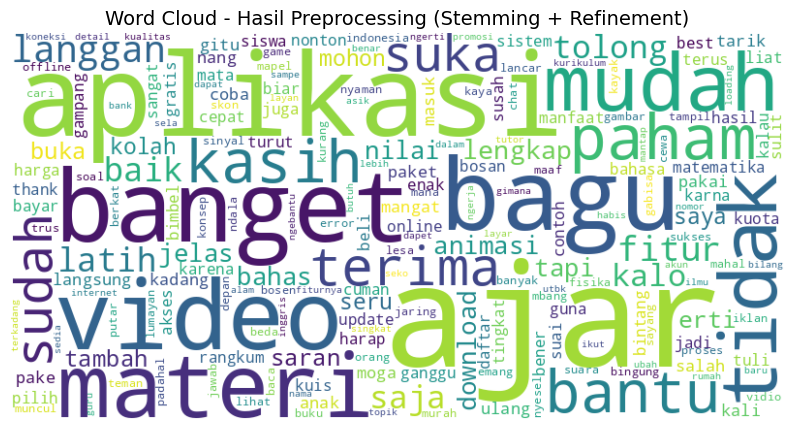

In [234]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks hasil preprocessing menjadi satu string besar
all_content = ' '.join(data['cleaned_text'].astype(str))

# Buat objek WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    collocations=False,
    max_words=200  # opsional: batasi jumlah kata yang ditampilkan
).generate(all_content)

# Tampilkan WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Hasil Preprocessing (Stemming + Refinement)', fontsize=14)
plt.axis('off')
plt.show()


In [235]:
from nltk import FreqDist

# Gabungkan semua kata dari kolom cleaned_text
all_tokens = []
for text in data['cleaned_text']:
    tokens = text.split()  # pisahkan per kata
    all_tokens.extend(tokens)

# Hitung frekuensi kemunculan kata
word_freq_total = FreqDist(all_tokens)

# Tampilkan 20 kata yang paling sering muncul
print("20 kata yang paling sering muncul:")
for word, freq in word_freq_total.most_common(20):
    print(f"{word}: {freq}")


20 kata yang paling sering muncul:
ajar: 1000
aplikasi: 593
bagus: 446
banget: 440
video: 414
materi: 402
tidak: 311
mudah: 309
paham: 295
kasih: 265
bantu: 256
terima: 213
sudah: 195
suka: 182
langgan: 177
fitur: 158
latih: 140
baik: 137
tolong: 132
saja: 129


N-GRAM

In [236]:
from sklearn.feature_extraction.text import CountVectorizer

def generate_ngrams(texts, ngram_range=(1,1), top_n=20):
    # Membuat vectorizer
    vectorizer = CountVectorizer(ngram_range=ngram_range)

    # Fit & transform teks
    X = vectorizer.fit_transform(texts)

    # Ambil frekuensi setiap n-gram
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

    # Urutkan dari yang paling sering muncul
    sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)

    return sorted_words[:top_n]

In [237]:
# Unigram
top_unigram = generate_ngrams(data['cleaned_text'], ngram_range=(1,1), top_n=20)
print("🔹 20 Unigram Teratas:\n", top_unigram)

# BIGRAM
top_bigram = generate_ngrams(data['cleaned_text'], ngram_range=(2,2), top_n=20)
print("\n🔹 20 Bigram Teratas:\n", top_bigram)

# TRIGRAM
top_trigram = generate_ngrams(data['cleaned_text'], ngram_range=(3,3), top_n=20)
print("\n🔹 20 Trigram Teratas:\n", top_trigram)


🔹 20 Unigram Teratas:
 [('ajar', np.int64(1000)), ('aplikasi', np.int64(593)), ('bagus', np.int64(446)), ('banget', np.int64(440)), ('video', np.int64(414)), ('materi', np.int64(402)), ('tidak', np.int64(311)), ('mudah', np.int64(309)), ('paham', np.int64(295)), ('kasih', np.int64(265)), ('bantu', np.int64(256)), ('terima', np.int64(213)), ('sudah', np.int64(195)), ('suka', np.int64(182)), ('langgan', np.int64(177)), ('fitur', np.int64(158)), ('latih', np.int64(140)), ('baik', np.int64(137)), ('tolong', np.int64(132)), ('saja', np.int64(129))]

🔹 20 Bigram Teratas:
 [('terima kasih', np.int64(202)), ('mudah paham', np.int64(130)), ('aplikasi bagus', np.int64(115)), ('bagus banget', np.int64(95)), ('video ajar', np.int64(68)), ('bantu ajar', np.int64(61)), ('aplikasi bantu', np.int64(61)), ('paham materi', np.int64(57)), ('aplikasi ajar', np.int64(51)), ('mudah erti', np.int64(51)), ('banget ajar', np.int64(48)), ('suka banget', np.int64(42)), ('tolong baik', np.int64(41)), ('ajar mudah

In [238]:
# --- 5. Ubah ke DataFrame ---
df_unigram = pd.DataFrame(top_unigram, columns=['Unigram', 'Frequency'])
df_bigram = pd.DataFrame(top_bigram, columns=['Bigram', 'Frequency'])
df_trigram = pd.DataFrame(top_trigram, columns=['Trigram', 'Frequency'])


/tmp/ipython-input-2018492146.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Unigram', data=df_unigram, palette='cool')


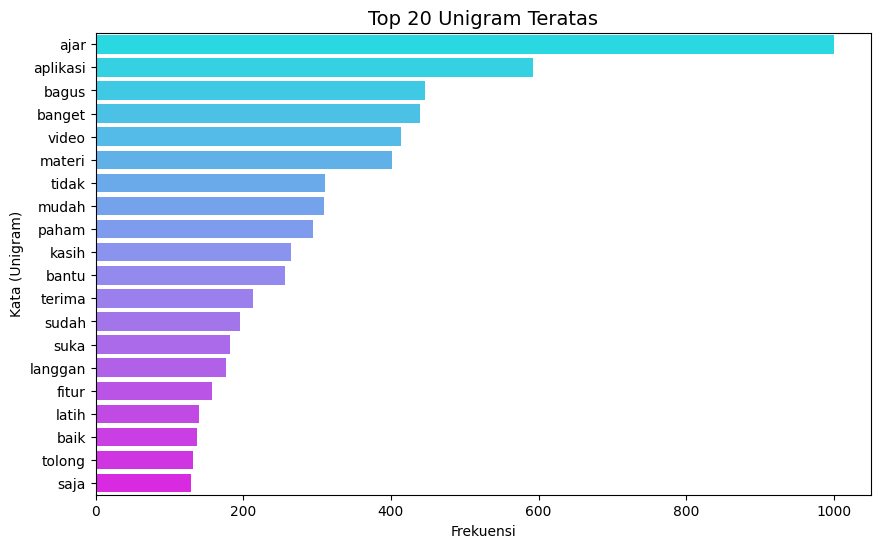

In [239]:
# --- 6. Visualisasi Unigram ---
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Unigram', data=df_unigram, palette='cool')
plt.title('Top 20 Unigram Teratas', fontsize=14)
plt.xlabel('Frekuensi')
plt.ylabel('Kata (Unigram)')
plt.show()

/tmp/ipython-input-3173518612.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=df_bigram, palette='viridis')


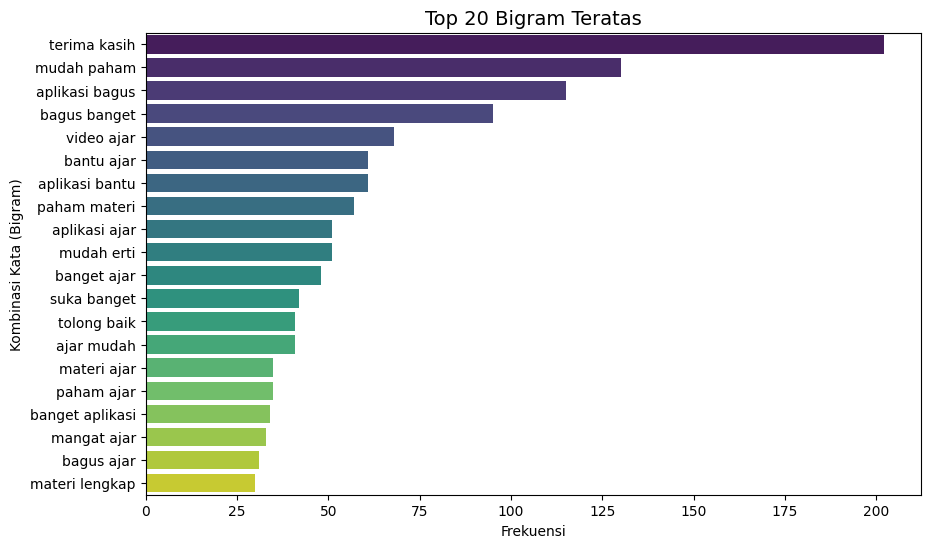

In [240]:
# --- 7. Visualisasi Bigram ---
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Bigram', data=df_bigram, palette='viridis')
plt.title('Top 20 Bigram Teratas', fontsize=14)
plt.xlabel('Frekuensi')
plt.ylabel('Kombinasi Kata (Bigram)')
plt.show()

/tmp/ipython-input-1704557536.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=df_trigram, palette='magma')


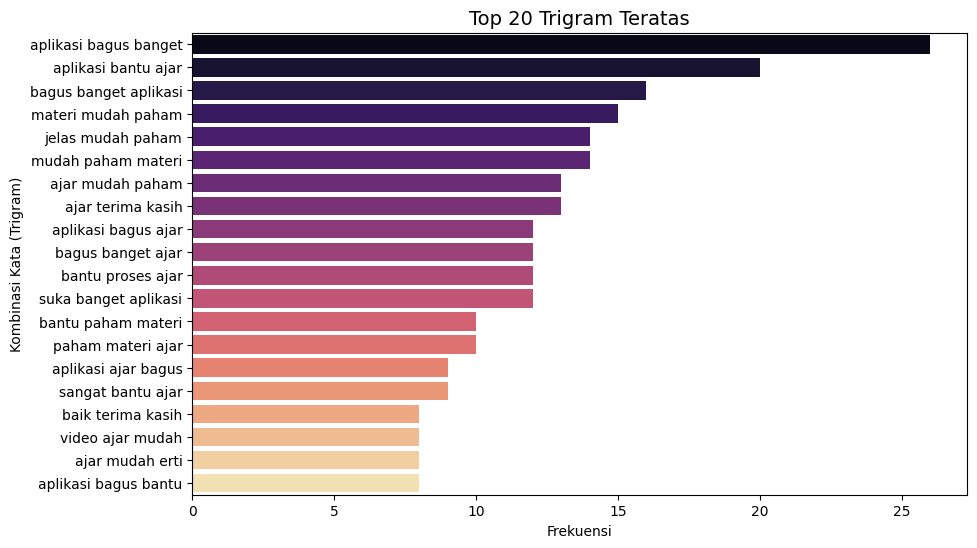

In [241]:
# --- 8. Visualisasi Trigram ---
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Trigram', data=df_trigram, palette='magma')
plt.title('Top 20 Trigram Teratas', fontsize=14)
plt.xlabel('Frekuensi')
plt.ylabel('Kombinasi Kata (Trigram)')
plt.show()

In [242]:
# --- 9. Simpan ke CSV ---
df_unigram.to_csv('unigram_ruangguru.csv', index=False, encoding='utf-8-sig')
df_bigram.to_csv('bigram_ruangguru.csv', index=False, encoding='utf-8-sig')
df_trigram.to_csv('trigram_ruangguru.csv', index=False, encoding='utf-8-sig')

print("✅ Unigram, Bigram, dan Trigram berhasil dibuat, divisualisasikan, dan disimpan sebagai CSV!")

✅ Unigram, Bigram, dan Trigram berhasil dibuat, divisualisasikan, dan disimpan sebagai CSV!
